In [1]:
!git clone https://github.com/georgiosarvanitidis/geometric_ml.git

Cloning into 'geometric_ml'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 102 (delta 11), reused 40 (delta 8), pack-reused 59
Receiving objects: 100% (102/102), 348.02 KiB | 15.82 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.8 MB/s eta 0:00:00


In [4]:
cd geometric_ml/

[Errno 2] No such file or directory: 'geometric_ml/'
/content/geometric_ml


In [5]:
import numpy as np
from python.core import utils, geodesics, geometric_methods, manifolds
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

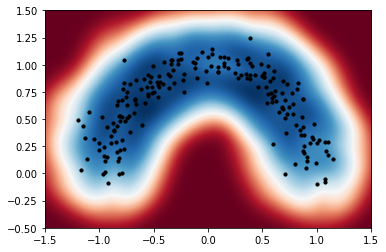

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[Initialize: 1/2] [Process point: 1/60]
[Initialize: 1/2] [Process point: 2/60]
Geodesic solver (bvp) failed!
[Initialize: 1/2] [Process point: 3/60]
[Initialize: 1/2] [Process point: 4/60]
[Initialize: 1/2] [Process point: 5/60]
[Initialize: 1/2] [Process point: 6/60]
Geodesic solver (bvp) failed!
[Initialize: 1/2] [Process point: 7/60]
[Initialize: 1/2] [Process point: 8/60]
[Initialize: 1/2] [Process point: 9/60]
[Initialize: 1/2] [Process point: 10/60]
Geodesic solver (bvp) failed!
[Initialize: 1/2] [Process point: 11/60]
[Initialize: 1/2] [Process point: 12/60]
[Initialize: 1/2] [Process point: 13/60]
[Initialize: 1/2] [Process point: 14/60]
Geodesic solver (bvp) failed!
[Initialize: 1/2] [Process point: 15/60]
[Initialize: 1/2] [Process point: 16/60]
[Initialize: 1/2] [Process point: 17/60]
[Initialize: 1/2] [Process point: 18/60]
[Initialize: 1/2] [Process point: 19/60]
Geodesic solver (bvp) failed!
[Initialize: 1/2] [Process point: 20/60]
[Initialize: 1/2] [Process point: 21/60

/content/geometric_ml/python/core/geodesics.py:132: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  curve_length_eval = integrate.quad(lambda t: local_length(manifold, curve, t), a, b, epsabs=tol, limit=limit)  # , number of subintervals


Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic solver (bvp) failed!
Geodesic s

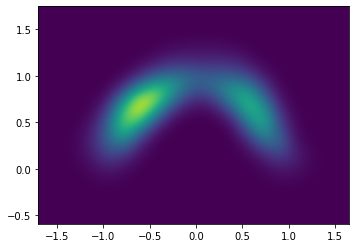

In [6]:


'''
In this example we fit a LAND model on a simple data manifold.
    "A Locally Adaptive Normal Distribution",
        G. Arvanitidis, et. al., NeurIPS 2016
'''

# Generate the data
params = {'N': 200, 'data_type': 1, 'sigma': 0.1}
data = utils.generate_data(params)

# Construct the manifold
manifold = manifolds.LocalDiagPCA(data=data, sigma=0.15, rho=1e-2)

# Plot the Riemannian volume element
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
utils.my_plot(data, c='k', s=10)
plt.axis('image')
plt.pause(0.1)

# Prepare the solver
solver = geodesics.SolverBVP(NMax=100, tol=1e-1)

# Fit the LAND model
LAND_DATA = KMeans(n_clusters=60).fit(data).cluster_centers_
params = {}
params['means'] = KMeans(n_clusters=2).fit(data).cluster_centers_
params['K'] = 2
params['S'] = 100
params['max_iter'] = 10
params['tol'] = 0.1
params['step_size'] = 0.1
params['mixing_param'] = 0  # [0, 1] how much between empirical covariance and identity
land_res_prior = geometric_methods.land_mixture_model(manifold=manifold,
                                                      solver=solver,
                                                      data=LAND_DATA,
                                                      param=params)

# Plot the density
z1min, z2min = data.min(0) - 0.5
z1max, z2max = data.max(0) + 0.5
N_Z_grid = 20
Z_grid = utils.my_meshgrid(z1min, z1max, z2min, z2max, N=N_Z_grid)
Logmaps = np.zeros((2, Z_grid.shape[0], data.shape[1]))  # The logmaps for each center
for k in range(2):
    for n in range(Z_grid.shape[0]):
        # If the solver fails then the logmap is overestimated (straight line)
        curve_bvp, logmap_bvp, curve_length_bvp, failed_bvp, solution_bvp \
            = geodesics.compute_geodesic(solver, manifold,
                                         land_res_prior['means'][k, :].reshape(-1, 1),
                                         Z_grid[n, :].reshape(-1, 1))
        Logmaps[k, n, :] = logmap_bvp.ravel()

pdf_vals = np.zeros((Z_grid.shape[0], 1))
for k in range(2):
    pdf_vals += land_res_prior['Weights'][k, 0] * (np.exp(-0.5 * np.diag(Logmaps[k, :, :] @ np.linalg.inv(land_res_prior['Sigmas'][k, :, :]) @ Logmaps[k, :, :].T)) / land_res_prior['Consts'][k, 0]).reshape(-1, 1)
plt.imshow(pdf_vals.reshape(N_Z_grid, N_Z_grid), interpolation='bicubic',
           extent=(z1min, z1max, z2min, z2max), origin='lower')

